# MNIST Dataset in CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax
from tensorflow import keras
from keras.datasets.mnist import load_data
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from matplotlib import pyplot

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [3]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

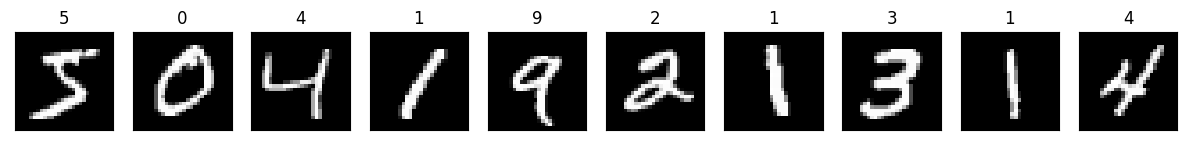

In [4]:
fig = plt.figure(figsize=(15,3))
for i in range(10):
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [5]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [6]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inp_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [9]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 36s - loss: 0.2485 - accuracy: 0.9243 - val_loss: 0.0586 - val_accuracy: 0.9827 - 36s/epoch - 86ms/step
Epoch 2/10
422/422 - 32s - loss: 0.0825 - accuracy: 0.9747 - val_loss: 0.0444 - val_accuracy: 0.9872 - 32s/epoch - 76ms/step
Epoch 3/10
422/422 - 33s - loss: 0.0605 - accuracy: 0.9806 - val_loss: 0.0328 - val_accuracy: 0.9903 - 33s/epoch - 79ms/step
Epoch 4/10
422/422 - 28s - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0336 - val_accuracy: 0.9912 - 28s/epoch - 67ms/step
Epoch 5/10
422/422 - 27s - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0272 - val_accuracy: 0.9922 - 27s/epoch - 65ms/step
Epoch 6/10
422/422 - 27s - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0277 - val_accuracy: 0.9920 - 27s/epoch - 65ms/step
Epoch 7/10
422/422 - 27s - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0244 - val_accuracy: 0.9938 - 27s/epoch - 64ms/step
Epoch 8/10
422/422 - 27s - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0313 - val_accuracy: 0.9918 - 27s/epoch - 64ms/step


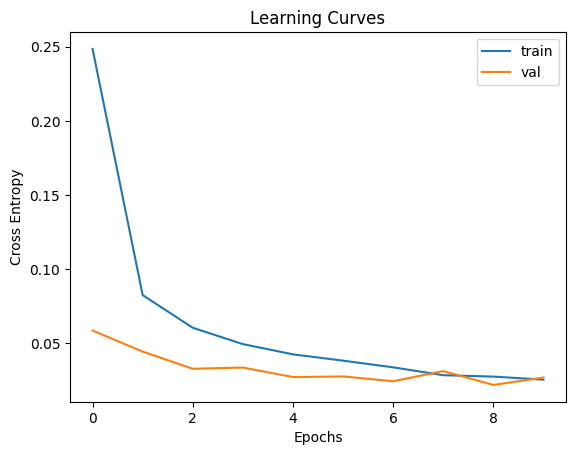

In [10]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()


In [20]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.1599977016449


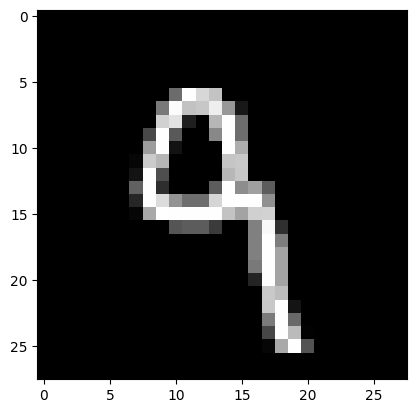

In [65]:
# pick a random number from test data
random_num = np.random.randint(0, len(x_test))
image = x_train[random_num]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [66]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(argmax(yhat)))

1/1 [==============================] - 0s 86ms/step
Predicted: 9
